gstiff
[[ 6.82743382e+05 -1.02403827e+06  7.68046426e+01 -6.82743382e+05
   1.02403827e+06  7.68046426e+01  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-1.02403827e+06  1.53610861e+06  5.12030950e+01  1.02403827e+06
  -1.53610861e+06  5.12030950e+01  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 7.68046426e+01  5.12030950e+01  2.21880078e+02 -7.68046426e+01
  -5.12030950e+01  1.10940039e+02  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-6.82743382e+05  1.02403827e+06 -7.68046426e+01  2.68274338e+06
  -1.02403827e+06 -7.68046426e+01 -2.00000000e+06  0.00000000e+00
   0.00000000e+00]
 [ 1.02403827e+06 -1.53610861e+06 -5.12030950e+01 -1.02403827e+06
   1.53614611e+06  2.37969050e+01  0.00000000e+00 -3.75000000e+01
   7.50000000e+01]
 [ 7.68046426e+01  5.12030950e+01  1.10940039e+02 -7.68046426e+01
   2.37969050e+01  4.21880078e+02  0.00000000e+00 -7.50000000e+01
   1.00000000e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.00000000e+06
   0.00000000e+00  0.

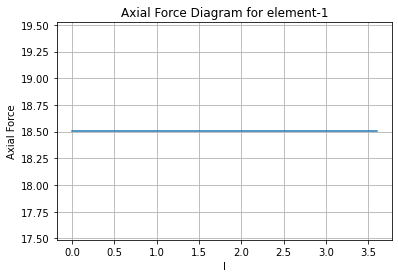

Axial force in 2nd element is -[-12.20637461] 


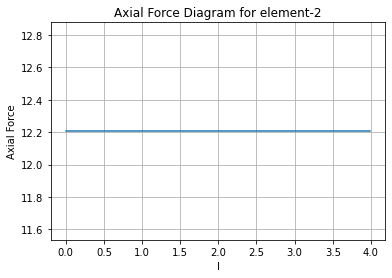

Shear force in 1st element is ([-12.20637461]*sin(θ)+[14.10311509]*cos(θ)) 


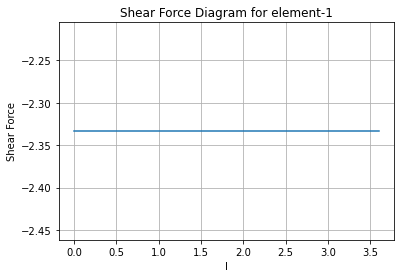

Shear force in 2nd element is [14.10311509]-8*x 


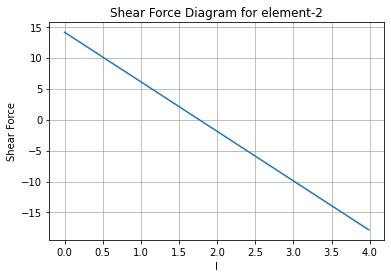

 Bending momentin 1st element is ([-12.20637461]*sin(θ)+[14.10311509]*cos(θ))*x-[-2.80390111]


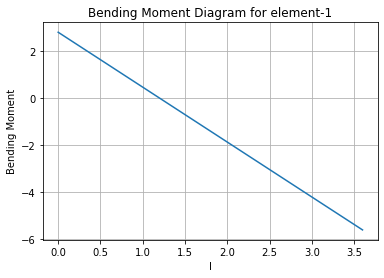

Bending moment in 2nd element is ([-12.20637461]*sin(θ)+[14.10311509]*cos(θ))*3.605551275463989-[-2.80390111]-(4*x^2)+([14.10311509]*x) 


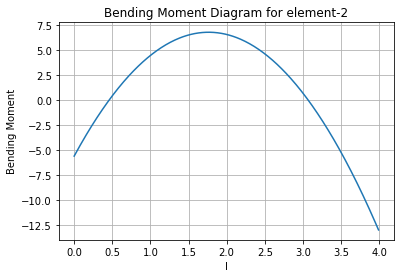

In [2]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
ndcon= np.array([[1,2],[2,3]])
nelem = len(ndcon)
ndofn=3
nnode=2
x=[0,2,6]
y=[0,-3,-3]
E=200e6
I=1e-6
A=0.04
L=3
nodes=len(x)
tdofs=nodes*ndofn
gstiff = np.zeros([tdofs,tdofs])
ielem=0
while ielem < 2:   
    x1 =x[ndcon[ielem][0]-1]
    x2 =x[ndcon[ielem][1]-1]
    y1 =y[ndcon[ielem][0]-1]
    y2 =y[ndcon[ielem][1]-1]
    gbdof=[]
    L = mt.sqrt((x2-x1)**2+(y2-y1)**2)
    #print(L)
    C =(x2-x1)/L
    #print(C)
    S = (y2-y1)/L
    #print(S)
    Ri=np.array([[C,S,0 ],           
    [-S,C,0],
    [0,0,1]]);
    b=np.zeros([3,3])
    c=np.concatenate((Ri,b),axis=1)
    d=np.concatenate((b,Ri),axis=1)
    Rt=np.concatenate((c,d,),axis=0)
    #print(Rt)
    K1 =np.matrix('%s, %s , %s, %s, %s, %s; %s, %s , %s, %s, %s, %s; %s, %s , %s, %s, %s, %s; %s, %s, %s, %s, %s, %s; %s, %s, %s, %s, %s, %s; %s, %s, %s, %s, %s, %s' % (A*E/L,0,0,-A*E/L,0,0,0,12*E*I/L**3, 6*E*I/L**2,0,-12*E*I/L**3,6*E*I/L**2,0,6*E*I/L**2,4*E*I/L,0,-6*E*I/L**2,2*E*I/L,-A*E/L,0,0,A*E/L,0,0,0,-12*E*I/L**3,-6*E*I/L**2,0,12*E*I/L**3,-6*E*I/L**2,0,6*E*I/L**2,2*E*I/L,0,-6*E*I/L**2,4*E*I/L))
    K1=np.transpose(Rt).dot(K1).dot(Rt)
    #print("K1 is %s" %(K1))
    inode =0
    while inode < nnode:
        idofn=1
        while idofn <= ndofn:
            gbdof.append((ndcon[ielem,inode]-1)*ndofn+idofn)
            idofn += 1
        inode += 1
    i = 0
    if i == 0:
        gstiff[gbdof[i]-1,gbdof[i]-1]=gstiff[gbdof[i]-1,gbdof[i]-1] + K1[0,0]
        gstiff[gbdof[i]-1,gbdof[i+1]-1]=gstiff[gbdof[i]-1,gbdof[i+1]-1] + K1[0,1]
        gstiff[gbdof[i]-1,gbdof[i+2]-1]=gstiff[gbdof[i]-1,gbdof[i+2]-1] + K1[0,2]
        gstiff[gbdof[i]-1,gbdof[i+3]-1]=gstiff[gbdof[i]-1,gbdof[i+3]-1] + K1[0,3]
        gstiff[gbdof[i]-1,gbdof[i+4]-1]=gstiff[gbdof[i]-1,gbdof[i+4]-1] + K1[0,4]
        gstiff[gbdof[i]-1,gbdof[i+5]-1]=gstiff[gbdof[i]-1,gbdof[i+5]-1] + K1[0,5]
    i = 1
    if i == 1:
        gstiff[gbdof[i]-1,gbdof[i-1]-1]=gstiff[gbdof[i]-1,gbdof[i-1]-1] + K1[1,0]
        gstiff[gbdof[i]-1,gbdof[i]-1]=gstiff[gbdof[i]-1,gbdof[i]-1]     + K1[1,1]
        gstiff[gbdof[i]-1,gbdof[i+1]-1]=gstiff[gbdof[i]-1,gbdof[i+1]-1] + K1[1,2]
        gstiff[gbdof[i]-1,gbdof[i+2]-1]=gstiff[gbdof[i]-1,gbdof[i+2]-1] + K1[1,3]
        gstiff[gbdof[i]-1,gbdof[i+3]-1]=gstiff[gbdof[i]-1,gbdof[i+3]-1] + K1[1,4]
        gstiff[gbdof[i]-1,gbdof[i+4]-1]=gstiff[gbdof[i]-1,gbdof[i+4]-1] + K1[1,5]
    i = 2
    if i == 2:
        gstiff[gbdof[i]-1,gbdof[i-2]-1]=gstiff[gbdof[i]-1,gbdof[i-2]-1] + K1[2,0]
        gstiff[gbdof[i]-1,gbdof[i-1]-1]=gstiff[gbdof[i]-1,gbdof[i-1]-1] + K1[2,1]
        gstiff[gbdof[i]-1,gbdof[i]-1]=gstiff[gbdof[i]-1,gbdof[i]-1]     + K1[2,2]
        gstiff[gbdof[i]-1,gbdof[i+1]-1]=gstiff[gbdof[i]-1,gbdof[i+1]-1] + K1[2,3]
        gstiff[gbdof[i]-1,gbdof[i+2]-1]=gstiff[gbdof[i]-1,gbdof[i+2]-1] + K1[2,4]
        gstiff[gbdof[i]-1,gbdof[i+3]-1]=gstiff[gbdof[i]-1,gbdof[i+3]-1] + K1[2,5]
    i = 3 
    if i == 3:
        gstiff[gbdof[i]-1,gbdof[i-3]-1]=gstiff[gbdof[i]-1,gbdof[i-3]-1] + K1[3,0]
        gstiff[gbdof[i]-1,gbdof[i-2]-1]=gstiff[gbdof[i]-1,gbdof[i-2]-1] + K1[3,1]
        gstiff[gbdof[i]-1,gbdof[i-1]-1]=gstiff[gbdof[i]-1,gbdof[i-1]-1] + K1[3,2]
        gstiff[gbdof[i]-1,gbdof[i]-1]=gstiff[gbdof[i]-1,gbdof[i]-1]     + K1[3,3]
        gstiff[gbdof[i]-1,gbdof[i+1]-1]=gstiff[gbdof[i]-1,gbdof[i+1]-1] + K1[3,4]
        gstiff[gbdof[i]-1,gbdof[i+2]-1]=gstiff[gbdof[i]-1,gbdof[i+2]-1] + K1[3,5]
    i = 4 
    if i == 4:
        gstiff[gbdof[i]-1,gbdof[i-4]-1]=gstiff[gbdof[i]-1,gbdof[i-4]-1] + K1[4,0]
        gstiff[gbdof[i]-1,gbdof[i-3]-1]=gstiff[gbdof[i]-1,gbdof[i-3]-1] + K1[4,1]
        gstiff[gbdof[i]-1,gbdof[i-2]-1]=gstiff[gbdof[i]-1,gbdof[i-2]-1] + K1[4,2]
        gstiff[gbdof[i]-1,gbdof[i-1]-1]=gstiff[gbdof[i]-1,gbdof[i-1]-1]  + K1[4,3]
        gstiff[gbdof[i]-1,gbdof[i]-1]=gstiff[gbdof[i]-1,gbdof[i]-1] + K1[4,4]
        gstiff[gbdof[i]-1,gbdof[i+1]-1]=gstiff[gbdof[i]-1,gbdof[i+1]-1] + K1[4,5]   
    i = 5 
    if i == 5:
        gstiff[gbdof[i]-1,gbdof[i-5]-1]=gstiff[gbdof[i]-1,gbdof[i-5]-1] + K1[5,0]
        gstiff[gbdof[i]-1,gbdof[i-4]-1]=gstiff[gbdof[i]-1,gbdof[i-4]-1] + K1[5,1]
        gstiff[gbdof[i]-1,gbdof[i-3]-1]=gstiff[gbdof[i]-1,gbdof[i-3]-1] + K1[5,2]
        gstiff[gbdof[i]-1,gbdof[i-2]-1]=gstiff[gbdof[i]-1,gbdof[i-2]-1]  + K1[5,3]
        gstiff[gbdof[i]-1,gbdof[i-1]-1]=gstiff[gbdof[i]-1,gbdof[i-1]-1] + K1[5,4]
        gstiff[gbdof[i]-1,gbdof[i]-1]=gstiff[gbdof[i]-1,gbdof[i]-1] + K1[5,5]   
    
    ielem += 1
print("gstiff")
print(gstiff)
b=np.delete(gstiff,[0,1,2,6,7,8],0)
c=np.delete(b,[0,1,2,6,7,8],1)
#print(c)
f=np.matrix('0;-16;-10.667')
u = np.linalg.inv(c).dot(f)
print("free displacements is %s" %u)
U=np.zeros([tdofs,1])
i=0
while i<3:
    U[i+3][0]=u[i][0]
    i +=1
print("All displacements is %s" %U)
f= gstiff[0:3].dot(U)
print("reactions at 1st node")
print(f)
f2= np.matrix('%s;%s;%s'%(0,16,-10.667))+ gstiff[6:9].dot(U)
print("reactions at 4th node")
print(f2)
#Afd
ielem=0
x1 =x[ndcon[ielem][0]-1]
x2 =x[ndcon[ielem][1]-1]
y1 =y[ndcon[ielem][0]-1]
y2 =y[ndcon[ielem][1]-1]
L1 = mt.sqrt((x2-x1)**2+(y2-y1)**2)
C =(x2-x1)/L1
S = (y2-y1)/L1
w= np.arange(0,L1,0.01)
z=-(f[0]*C)-(f[1]*S)+(0*w)
print("Axial force in 1st element is -(%s*sin(\u03B8)-%s*cos(\u03B8)) "%(f[1],f[0]))
plt.plot(w,z)
plt.xlabel('l')
plt.ylabel('Axial Force')
plt.title('Axial Force Diagram for element-1')
plt.grid(True)
plt.savefig('AFD_A4_Q2_1.png')
plt.show()

ielem =1
w= np.arange(0,4,0.01)
z=-f[0]+(0*w)
print("Axial force in 2nd element is -%s "%(f[0]))
plt.plot(w,z)
plt.xlabel('l')
plt.ylabel('Axial Force')
plt.title('Axial Force Diagram for element-2')
plt.grid(True)
plt.savefig('AFD_A4_Q2_2.png')
plt.show()

#sfd
ielem=0
x1 =x[ndcon[ielem][0]-1]
x2 =x[ndcon[ielem][1]-1]
y1 =y[ndcon[ielem][0]-1]
y2 =y[ndcon[ielem][1]-1]
L1 = mt.sqrt((x2-x1)**2+(y2-y1)**2)
C =(x2-x1)/L1
S = (y2-y1)/L1
w= np.arange(0,L1,0.01)
z=(-f[0]*S)+(f[1]*C)+(0*w)
print("Shear force in 1st element is (%s*sin(\u03B8)+%s*cos(\u03B8)) "%(f[0],f[1]))
plt.plot(w,z)
plt.xlabel('l')
plt.ylabel('Shear Force')
plt.title('Shear Force Diagram for element-1')
plt.grid(True)
plt.savefig('SFD_A4_Q2_1.png')
plt.show()

ielem =1
w= np.arange(0,4,0.01)
z=f[1]-(8*w)
print("Shear force in 2nd element is %s-8*x "%(f[1]))
plt.plot(w,z)
plt.xlabel('l')
plt.ylabel('Shear Force')
plt.title('Shear Force Diagram for element-2')
plt.grid(True)
plt.savefig('SFD_A4_Q2_2.png')
plt.show()

 #bmd
ielem=0
x1 =x[ndcon[ielem][0]-1]
x2 =x[ndcon[ielem][1]-1]
y1 =y[ndcon[ielem][0]-1]
y2 =y[ndcon[ielem][1]-1]
L1 = mt.sqrt((x2-x1)**2+(y2-y1)**2)
C =(x2-x1)/L1
S = (y2-y1)/L1
w= np.arange(0,L1,0.01)
z=(-(f[0]*S)+(f[1]*C))*w-f[2]
print(" Bending momentin 1st element is (%s*sin(\u03B8)+%s*cos(\u03B8))*x-%s"%(f[0],f[1],f[2]))
plt.plot(w,z)
plt.xlabel('l')
plt.ylabel('Bending Moment')
plt.title('Bending Moment Diagram for element-1')
plt.grid(True)
plt.savefig('BMD_A4_Q2_1.png')
plt.show()

ielem =1
w= np.arange(0,4,0.01)
z=(-(f[0]*S)+(f[1]*C))*L1-f[2]-(4*w**2)+f[1]*w
#print((-f[0]*S)+(f[1]*C))
print("Bending moment in 2nd element is (%s*sin(\u03B8)+%s*cos(\u03B8))*%s-%s-(4*x^2)+(%s*x) "%(f[0],f[1],L1,f[2],f[1]))
plt.plot(w,z)
plt.xlabel('l')
plt.ylabel('Bending Moment')
plt.title('Bending Moment Diagram for element-2')
plt.grid(True)
plt.savefig('BMD_A4_Q2_2.png')
plt.show()


